In [1]:
import mujoco
import pyrender
import numpy as np
import gymnasium
import skvideo.io
from base64 import b64encode
from IPython.display import HTML
from gymnasium.envs.registration import register

In [2]:
path = './ManiSkill-UR10e-main/ur10e.xml'
env_id = 'Environment'

In [3]:
register(
    id='Environment',
    entry_point='env:Environment',
    kwargs={
        'model_path': path
    }
)

In [4]:
env = gymnasium.make(env_id, model_path=path, render_mode='rgb_array', camera_id=5)

In [5]:
# Turning off the shadows
env.data.model.light_castshadow[0] = 0

/Users/saleh/miniconda3/envs/MyoLoco/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.data to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.data` for environment variables or `env.get_wrapper_attr('data')` that will search the reminding wrappers.
  logger.warn(


/Users/saleh/miniconda3/envs/MyoLoco/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float64, actual type: int64
  logger.warn(
/Users/saleh/miniconda3/envs/MyoLoco/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/Users/saleh/miniconda3/envs/MyoLoco/lib/python3.9/site-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


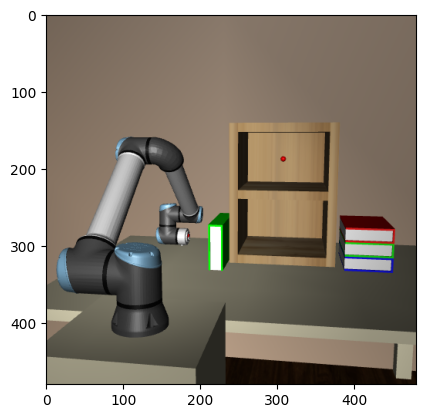

In [6]:
env.reset()
import matplotlib.pyplot as plt
env.step(np.zeros(env.action_space.shape))
plt.imshow(env.render())

In [7]:
# The generated actuator angles
points = np.load('angles.npy')

In [8]:
# Running the simulation
env = gymnasium.make(env_id, model_path=path, render_mode='rgb_array', camera_id=5)
env.data.model.light_castshadow[0] = 0
env.reset()
frames = []

for act in points:
    for _ in range(5):
        env.step(act)
        frame = env.render()
        frames.append(frame)

/Users/saleh/miniconda3/envs/MyoLoco/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.data to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.data` for environment variables or `env.get_wrapper_attr('data')` that will search the reminding wrappers.
  logger.warn(
/Users/saleh/miniconda3/envs/MyoLoco/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float64, actual type: int64
  logger.warn(


In [9]:
skvideo.io.vwrite("output.mp4", np.asarray(frames))

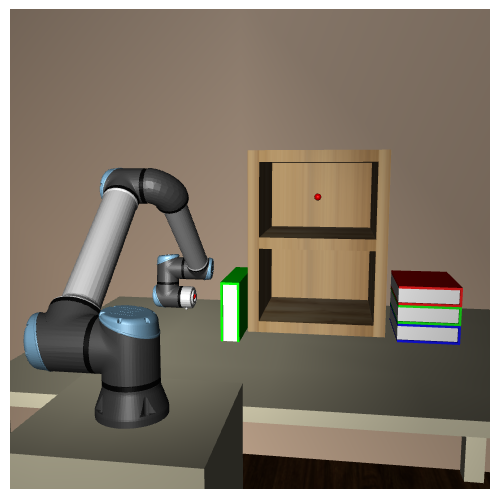

In [10]:
plt.imshow(frames[0])
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("start_frame.jpg", bbox_inches = 'tight',
    pad_inches = 0)

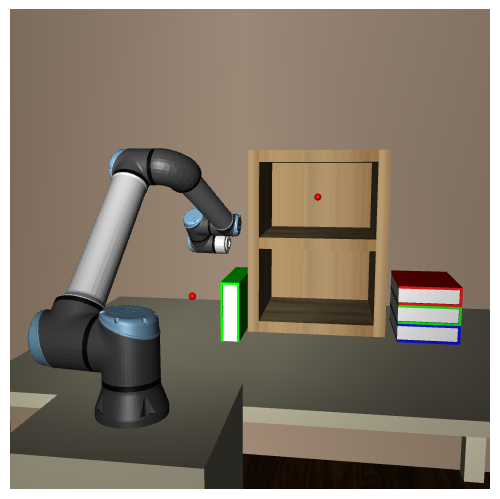

In [11]:
plt.imshow(frames[28])
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("middle_frame.jpg", bbox_inches = 'tight',
    pad_inches = 0)

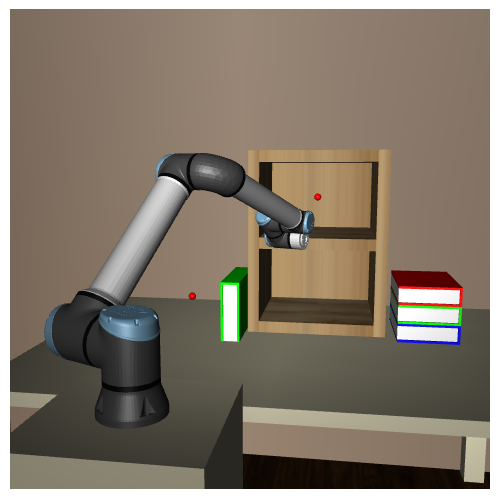

In [12]:
plt.imshow(frames[54])
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("goal_frame.jpg", bbox_inches = 'tight',
    pad_inches = 0)